House Prices - Advanced Regression Techniques

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt
    

In [75]:
# Import all the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle
from pandas_profiling import ProfileReport


In [2]:
traindf = pd.read_csv("train.csv")

In [3]:
traindf.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Know the number of features and rows
traindf.shape

(1460, 81)

In [5]:
# Know the columns and its data types
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Descriptive Analysis
traindf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Pandas profiling helps to ease the descriptive analysis, but providing the summary of content in charts
#profile = ProfileReport(traindf)
#profile.to_file('Pandas_profiling.html')

In [8]:
# drop the Id column as its unique identifier for each record. This variable doesnot have any dependence with target varilable
traindf.drop('Id',axis=1,inplace=True)

## Find the variables that has % of misisng values

## These steps will calculate and create a new dataframe with column name that has missing values, % of missing values in that column

In [9]:
##these steps will calculate and create a new dataframe with column name that has missing values, % of missing values in that column
cols_with_null = (traindf.isnull().sum()/traindf.shape[0]) * 100
cols_with_null.sort_values(ascending=False,inplace=True)
cols_with_nulldf = pd.DataFrame(cols_with_null,columns={'Missingpct'}).reset_index()
cols_with_nulldf= cols_with_nulldf.rename(columns={'index':'missingcolumn'})
cols_with_nulldf = cols_with_nulldf[cols_with_nulldf['Missingpct'] > 0]
cols_with_nulldf

,missingcolumn,Missingpct
0,PoolQC,99.520548
1,MiscFeature,96.301370
2,Alley,93.767123
3,Fence,80.753425
4,FireplaceQu,47.260274
5,LotFrontage,17.739726
6,GarageType,5.547945
7,GarageCond,5.547945
8,GarageFinish,5.547945
9,GarageQual,5.547945


In [10]:
# Take the column names that has more than 90 % of missing values
null_cols_to_drop = cols_with_nulldf[cols_with_nulldf['Missingpct'] >90 ]['missingcolumn']
null_cols_to_drop =null_cols_to_drop.to_list()
null_cols_to_drop

['PoolQC', 'MiscFeature', 'Alley']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: PoolQC, Length: 1460, dtype: int32


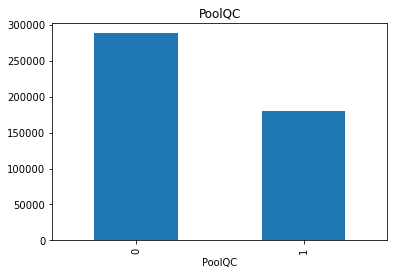

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    0
1458    1
1459    1
Name: MiscFeature, Length: 1460, dtype: int32


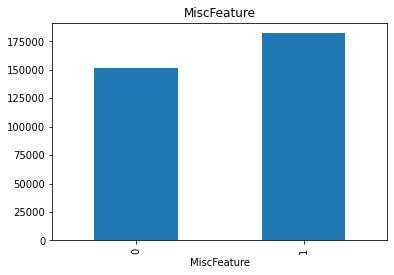

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: Alley, Length: 1460, dtype: int32


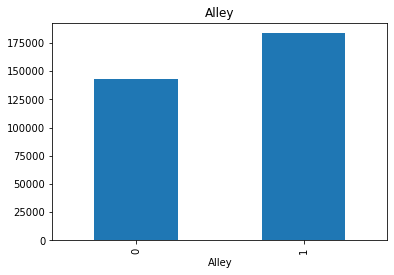

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    0
1457    0
1458    1
1459    1
Name: Fence, Length: 1460, dtype: int32


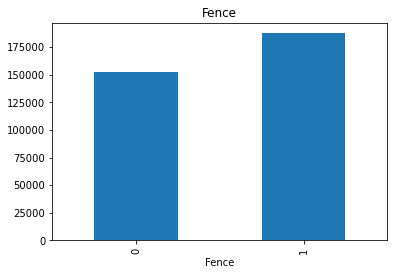

0       1
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    1
1459    1
Name: FireplaceQu, Length: 1460, dtype: int32


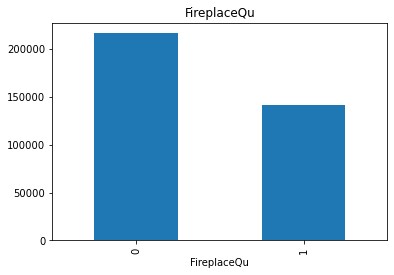

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: LotFrontage, Length: 1460, dtype: int32


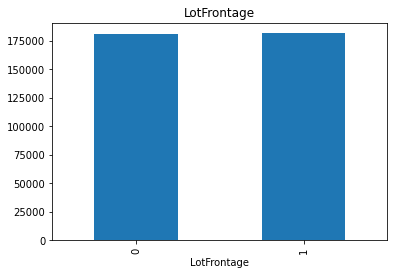

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: GarageType, Length: 1460, dtype: int32


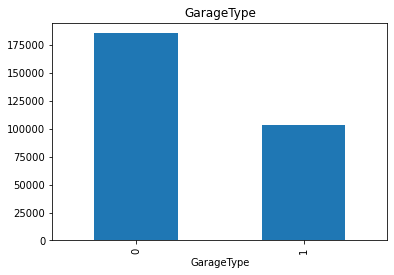

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: GarageCond, Length: 1460, dtype: int32


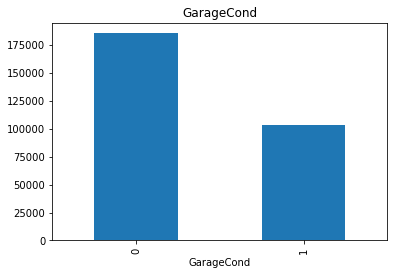

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: GarageFinish, Length: 1460, dtype: int32


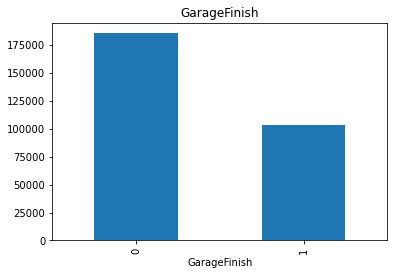

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: GarageQual, Length: 1460, dtype: int32


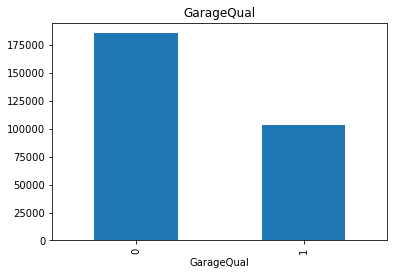

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: GarageYrBlt, Length: 1460, dtype: int32


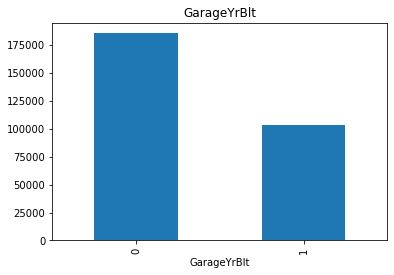

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: BsmtFinType2, Length: 1460, dtype: int32


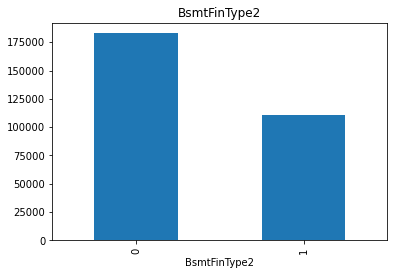

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: BsmtExposure, Length: 1460, dtype: int32


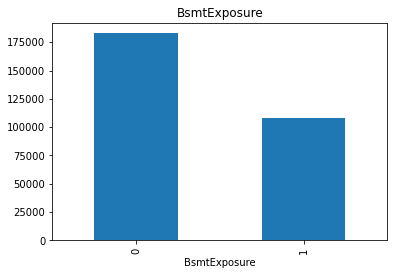

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: BsmtQual, Length: 1460, dtype: int32


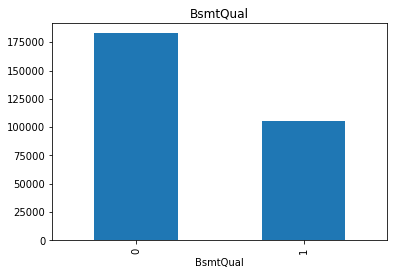

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: BsmtCond, Length: 1460, dtype: int32


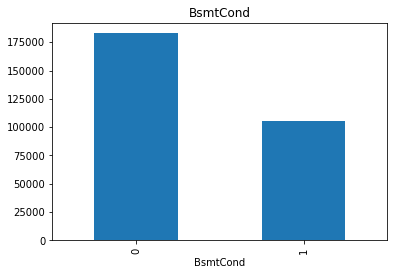

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: BsmtFinType1, Length: 1460, dtype: int32


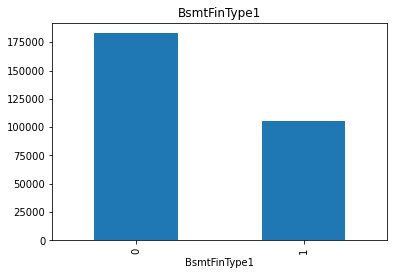

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: MasVnrArea, Length: 1460, dtype: int32


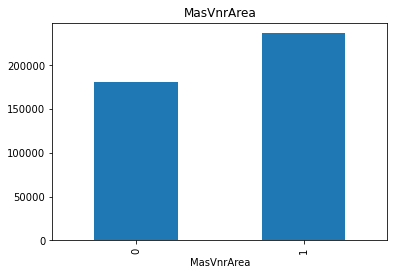

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: MasVnrType, Length: 1460, dtype: int32


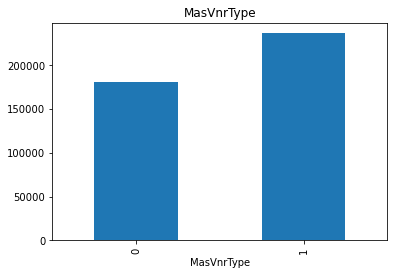

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: Electrical, Length: 1460, dtype: int32


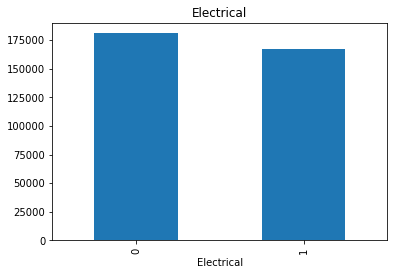

In [11]:
for variable in cols_with_nulldf['missingcolumn'].values:
    data1 = traindf.copy()
    
    data1[variable] = np.where(data1[variable].isnull(),1,0)
    print(data1[variable])
    
    data1.groupby(variable)['SalePrice'].mean().plot.bar()
    plt.title(variable)
    plt.show()

In [12]:
# Identify those columns that has more than 85% of rows has same value. 
not_nul_col_to_drop = []
for features in traindf.columns : 
    aa =(traindf[features].value_counts())
    aa1 = aa.apply(lambda x: (x/sum(aa.values)*100))
    print(aa1.head(5))
    print('\n')
    if aa1.head(1).values > 85:
        print('column to be dropped ',features)
        print('\n')
        not_nul_col_to_drop.append(features) 

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
Name: MSSubClass, dtype: float64


RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64


60.0    11.906744
70.0     5.828476
80.0     5.745212
50.0     4.746045
75.0     4.412989
Name: LotFrontage, dtype: float64


7200     1.712329
9600     1.643836
6000     1.164384
10800    0.958904
9000     0.958904
Name: LotArea, dtype: float64


Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64


column to be dropped  Street


Grvl    54.945055
Pave    45.054945
Name: Alley, dtype: float64


Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64


Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64


column to be dropped  LandContour


AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64


column to be dr

In [13]:
print(not_nul_col_to_drop)
print(len(not_nul_col_to_drop))

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'SaleType']
28


In [14]:
print(type(null_cols_to_drop))
print(type(not_nul_col_to_drop))
cols_to_drop = null_cols_to_drop + not_nul_col_to_drop
cols_to_drop = set(cols_to_drop)
print(len(cols_to_drop))

<class 'list'>
<class 'list'>
30


In [15]:
# Drop the columns from traindf dataframe 
traindf_drop = traindf.drop(cols_to_drop, axis=1)

In [16]:

traindf_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1452 non-null   object 
 17  MasVnrArea     1452 non-null   float64
 18  ExterQua

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'TotRmsAbv

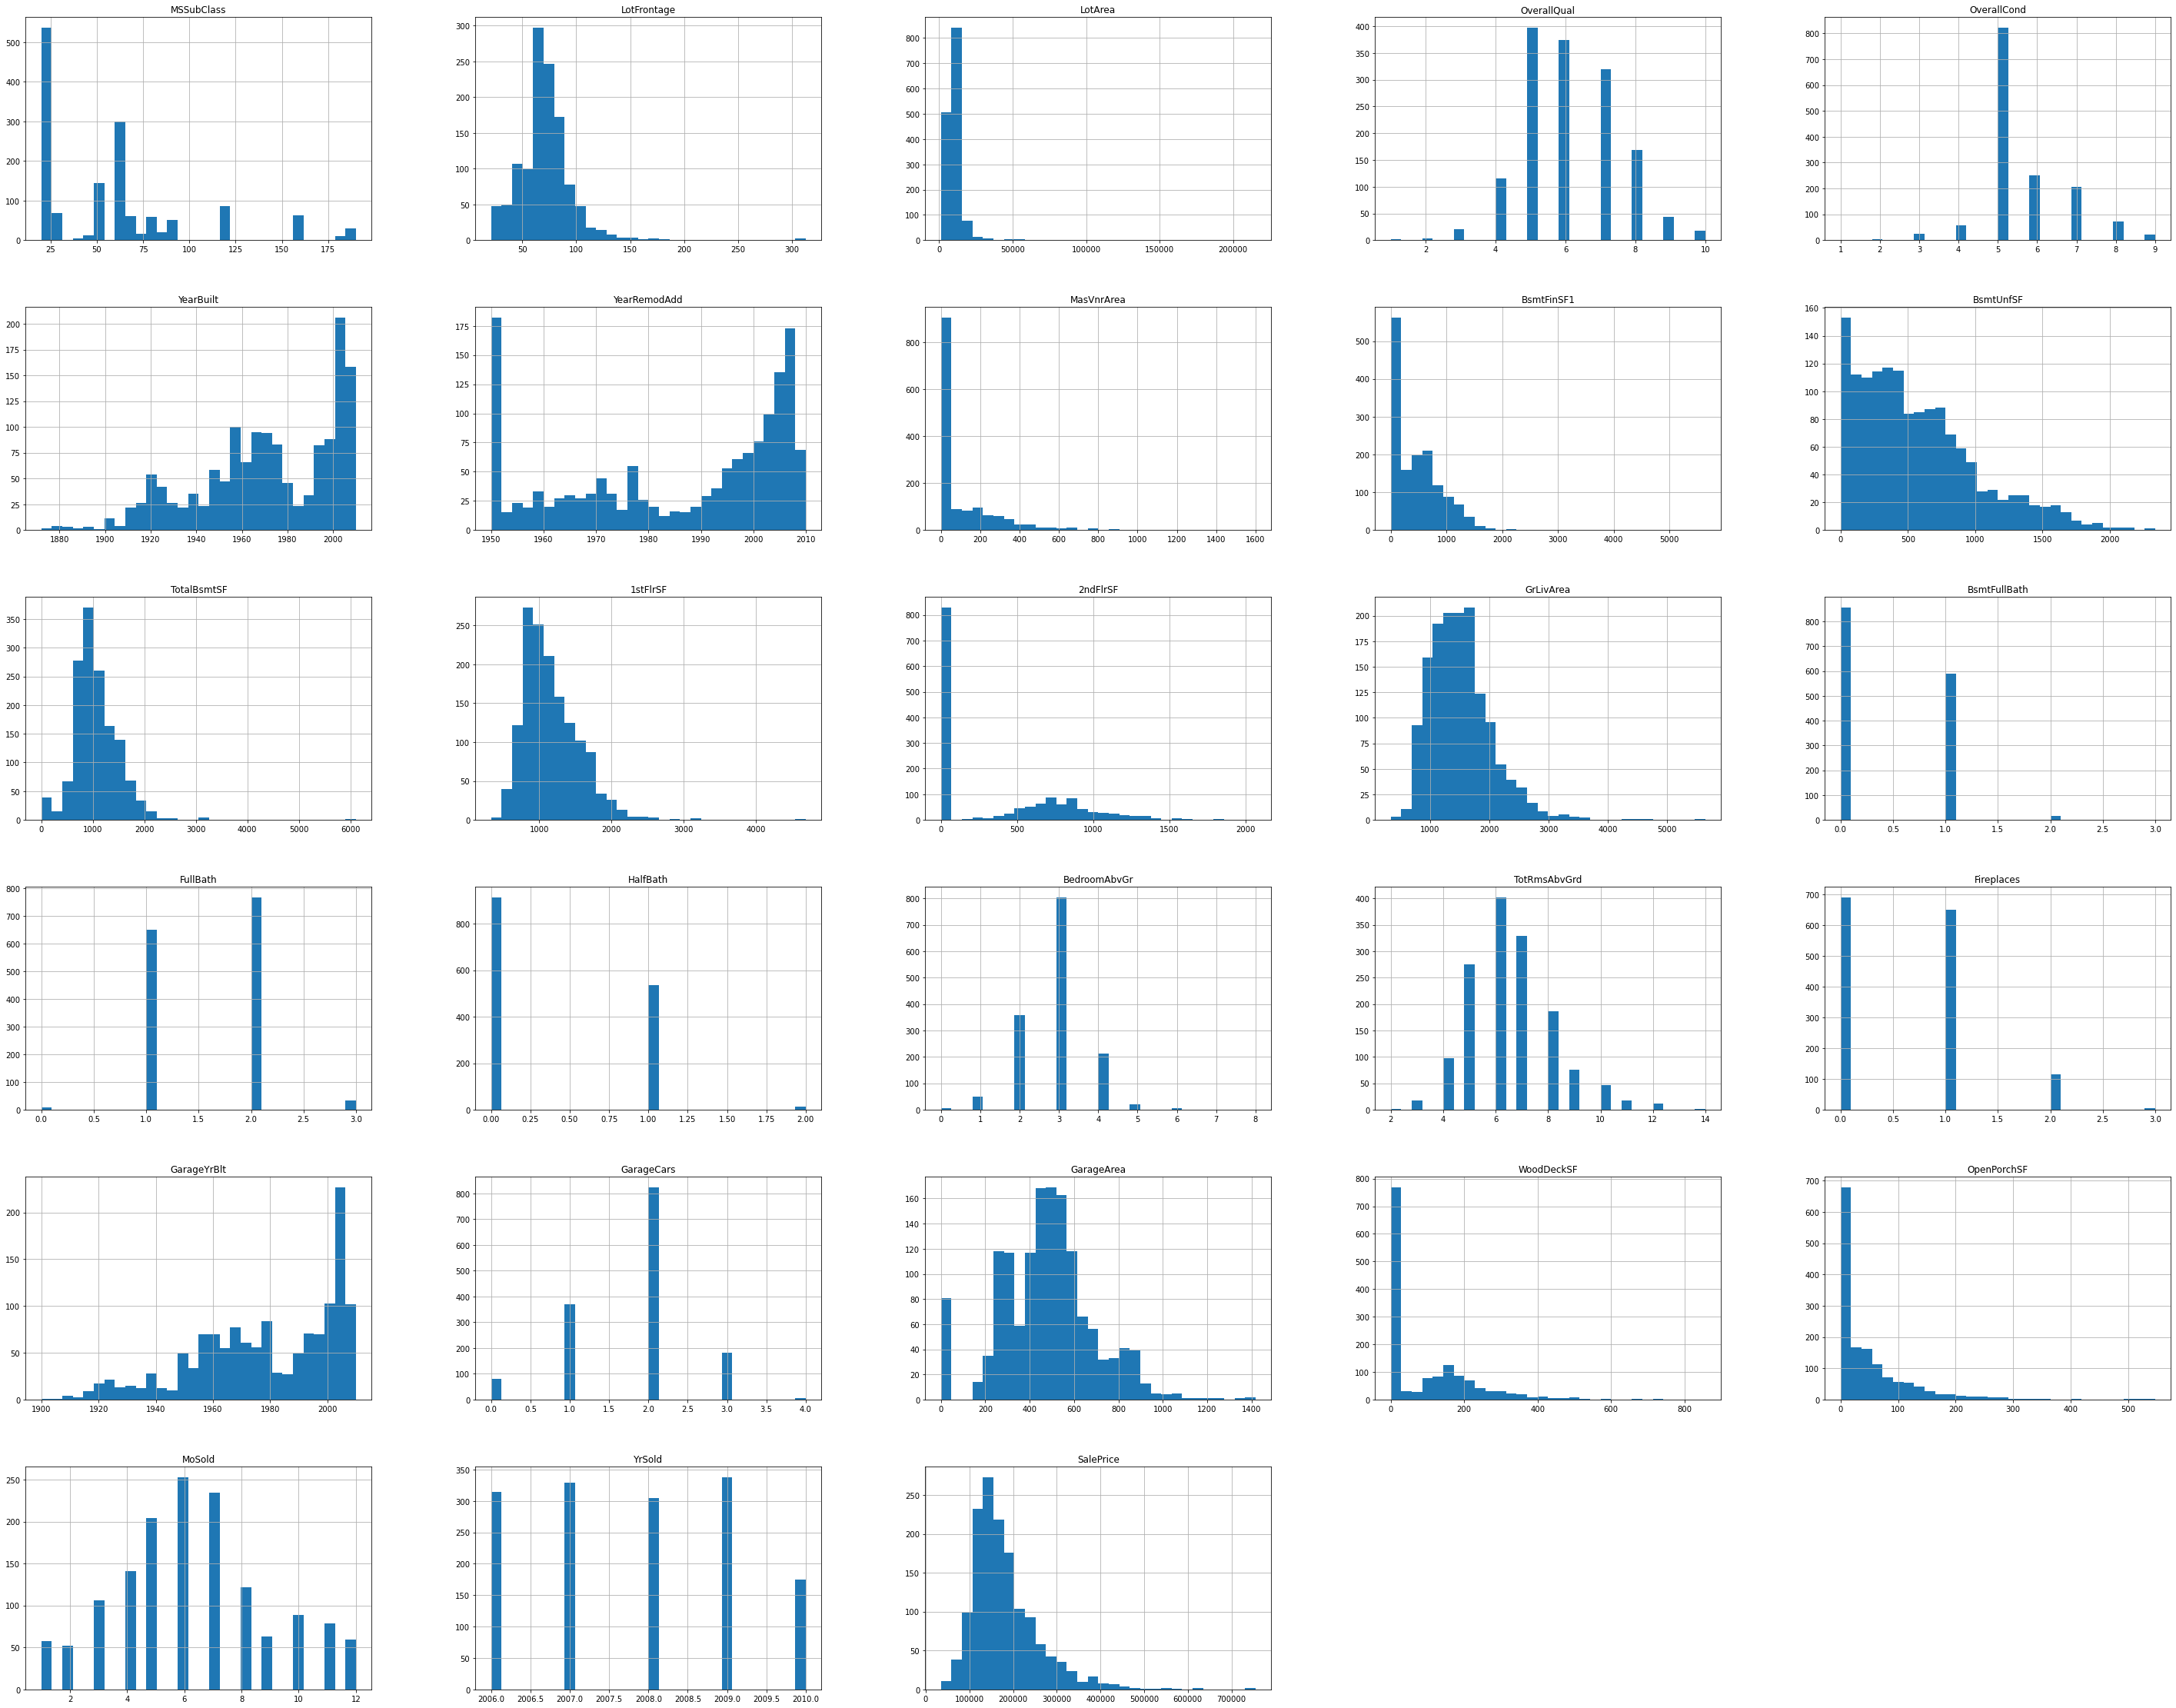

In [17]:
traindf_drop.hist(bins=30, figsize=(50,40 ))


In [18]:
# Split the dataframe into two, numerical & categorical. This split will help easy to fill the missing values for numerical 
# categorical variables separately
numeric_features  = [features for features in traindf_drop.columns if traindf_drop[features].dtype != 'object']
Object_features  = [features for features in traindf_drop.columns if traindf_drop[features].dtype == 'O']
print(' Numeric features ', len(numeric_features),' columns \n', numeric_features,'\n\n')
print(' Object features ', len(Object_features),' columns \n', Object_features,'\n\n')

 Numeric features  28  columns 
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'] 


 Object features  22  columns 
 ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition'] 




In [19]:
cols_list_with_null = cols_with_nulldf['missingcolumn'].tolist() 


In [20]:
numeric_null = [feature for feature in numeric_features if feature in cols_list_with_null]
print('numeric columns that has null ', numeric_null)

catagory_null = [feature for feature in Object_features if feature in cols_list_with_null]
print('catagory columns that has null', catagory_null)

numeric columns that has null  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
catagory columns that has null ['MasVnrType', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence']


In [21]:
# logic to fill the missing data for numeric columns using mean() value of the column
for feature in numeric_null:
    print('Before replacing Null')
    print(traindf_drop[feature].isnull().sum())
    traindf_drop[feature].fillna(traindf_drop[feature].mean(),inplace=True)

for feature in numeric_null:
    print('After replacing Null')
    print(traindf_drop[feature].isnull().sum())
    

Before replacing Null
259
Before replacing Null
8
Before replacing Null
81
After replacing Null
0
After replacing Null
0
After replacing Null
0


In [22]:
traindf_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1452 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

In [23]:
# logic to fill the missing data for numeric columns using mean() value of the column
for feature in catagory_null:
    print('NUmber of records with null Before replacing Null',feature, print(traindf_drop[feature].isnull().sum()))     
    traindf_drop[feature].fillna('missing',inplace=True)
    #traindf_drop[feature].fillna(traindf_drop[feature].mode(),inplace=True)
    # rework
 
for feature in catagory_null:
    print('NUmber of records with null after replacing Null ',feature, print(traindf_drop[feature].isnull().sum())) 
    

8
NUmber of records with null Before replacing Null MasVnrType None
37
NUmber of records with null Before replacing Null BsmtQual None
38
NUmber of records with null Before replacing Null BsmtExposure None
37
NUmber of records with null Before replacing Null BsmtFinType1 None
690
NUmber of records with null Before replacing Null FireplaceQu None
81
NUmber of records with null Before replacing Null GarageType None
81
NUmber of records with null Before replacing Null GarageFinish None
1179
NUmber of records with null Before replacing Null Fence None
0
NUmber of records with null after replacing Null  MasVnrType None
0
NUmber of records with null after replacing Null  BsmtQual None
0
NUmber of records with null after replacing Null  BsmtExposure None
0
NUmber of records with null after replacing Null  BsmtFinType1 None
0
NUmber of records with null after replacing Null  FireplaceQu None
0
NUmber of records with null after replacing Null  GarageType None
0
NUmber of records with null after

In [24]:
#build new columns for years and delete existing ones
traindf_drop['YearBuilt_Age']   = traindf_drop['YrSold'] - traindf_drop['YearBuilt'] 
traindf_drop['YearRemodAdd_Age']  = traindf_drop['YrSold'] - traindf_drop['YearRemodAdd']

traindf_drop['GarageYrBlt'] = traindf_drop['GarageYrBlt'].astype('int')
traindf_drop['GarageYrBlt_Age'] =traindf_drop['YrSold'] -  traindf_drop['GarageYrBlt'] 
 

In [25]:
# Drop the original date variables from the dataframe
traindf_drop.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True)

In [26]:
traindf_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   object 
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   LotShape          1460 non-null   object 
 5   LotConfig         1460 non-null   object 
 6   Neighborhood      1460 non-null   object 
 7   BldgType          1460 non-null   object 
 8   HouseStyle        1460 non-null   object 
 9   OverallQual       1460 non-null   int64  
 10  OverallCond       1460 non-null   int64  
 11  RoofStyle         1460 non-null   object 
 12  Exterior1st       1460 non-null   object 
 13  Exterior2nd       1460 non-null   object 
 14  MasVnrType        1460 non-null   object 
 15  MasVnrArea        1460 non-null   float64
 16  ExterQual         1460 non-null   object 


In [27]:
traindf_drop.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
missing      8
Name: MasVnrType, dtype: int64

In [28]:
for feature in traindf_drop:
    print(feature ,'     => ', traindf_drop[feature].isnull().sum()) 

MSSubClass      =>  0
MSZoning      =>  0
LotFrontage      =>  0
LotArea      =>  0
LotShape      =>  0
LotConfig      =>  0
Neighborhood      =>  0
BldgType      =>  0
HouseStyle      =>  0
OverallQual      =>  0
OverallCond      =>  0
RoofStyle      =>  0
Exterior1st      =>  0
Exterior2nd      =>  0
MasVnrType      =>  0
MasVnrArea      =>  0
ExterQual      =>  0
Foundation      =>  0
BsmtQual      =>  0
BsmtExposure      =>  0
BsmtFinType1      =>  0
BsmtFinSF1      =>  0
BsmtUnfSF      =>  0
TotalBsmtSF      =>  0
HeatingQC      =>  0
1stFlrSF      =>  0
2ndFlrSF      =>  0
GrLivArea      =>  0
BsmtFullBath      =>  0
FullBath      =>  0
HalfBath      =>  0
BedroomAbvGr      =>  0
KitchenQual      =>  0
TotRmsAbvGrd      =>  0
Fireplaces      =>  0
FireplaceQu      =>  0
GarageType      =>  0
GarageFinish      =>  0
GarageCars      =>  0
GarageArea      =>  0
WoodDeckSF      =>  0
OpenPorchSF      =>  0
Fence      =>  0
MoSold      =>  0
YrSold      =>  0
SaleCondition      =>  0


In [29]:
traindf_drop[traindf_drop['MasVnrType'] == 'None']

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,298,0,missing,5,2007,Normal,181500,31,31,31
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,35,missing,2,2006,Abnorml,140000,91,36,8
5,50,RL,85.0,14115,IR1,Inside,Mitchel,1Fam,1.5Fin,5,...,40,30,MnPrv,10,2009,Normal,143000,16,14,16
8,50,RM,51.0,6120,Reg,Inside,OldTown,1Fam,1.5Fin,7,...,90,0,missing,4,2008,Abnorml,129900,77,58,77
9,190,RL,50.0,7420,Reg,Corner,BrkSide,2fmCon,1.5Unf,5,...,0,4,missing,1,2008,Normal,118000,69,58,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,62.0,7500,Reg,Inside,Somerst,1Fam,1Story,7,...,0,113,missing,10,2009,Normal,185000,5,4,5
1455,60,RL,62.0,7917,Reg,Inside,Gilbert,1Fam,2Story,6,...,0,40,missing,8,2007,Normal,175000,8,7,8
1457,70,RL,66.0,9042,Reg,Inside,Crawfor,1Fam,2Story,7,...,0,60,GdPrv,5,2010,Normal,266500,69,4,69
1458,20,RL,68.0,9717,Reg,Inside,NAmes,1Fam,1Story,5,...,366,0,missing,4,2010,Normal,142125,60,14,60


In [30]:
traindf_drop['MasVnrType'] = traindf_drop['MasVnrType'].replace('None','NNN')

In [31]:
numeric_features  = [features for features in traindf_drop.columns if traindf_drop[features].dtype != 'object']
Object_features  = [features for features in traindf_drop.columns if traindf_drop[features].dtype == 'O']
print(' Numeric features ', len(numeric_features),' columns \n', numeric_features,'\n\n')
print(' Object features ', len(Object_features),' columns \n', Object_features,'\n\n')

 Numeric features  28  columns 
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice', 'YearBuilt_Age', 'YearRemodAdd_Age', 'GarageYrBlt_Age'] 


 Object features  22  columns 
 ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition'] 




In [32]:
# Copy the numerical not null data, categorical not null data and merge them
train_drop_num1 = traindf_drop[numeric_features]
train_drop_cat1 = traindf_drop[Object_features]


In [33]:
print(type(train_drop_cat1)) 
print(type(train_drop_num1)) 

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [34]:
train_drop_cat1_copy = train_drop_cat1

In [35]:
train_drop_cat1_copy.head(6)

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,...,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,SaleCondition
0,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,...,Gd,No,GLQ,Ex,Gd,missing,Attchd,RFn,missing,Normal
1,RL,Reg,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,NNN,...,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn,missing,Normal
2,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,...,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn,missing,Normal
3,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,NNN,...,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf,missing,Abnorml
4,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,...,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn,missing,Normal
5,RL,IR1,Inside,Mitchel,1Fam,1.5Fin,Gable,VinylSd,VinylSd,NNN,...,Gd,No,GLQ,Ex,TA,missing,Attchd,Unf,MnPrv,Normal


In [36]:
train_drop_cat1.Fence.value_counts()

missing    1179
MnPrv       157
GdPrv        59
GdWo         54
MnWw         11
Name: Fence, dtype: int64

In [37]:
##LABEL ENCODING

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for feature in Object_features:
    print('== feature ==' , feature)
    train_drop_cat1_copy[feature] = le.fit_transform(np.array(train_drop_cat1[feature]))
    print('== feature ==' , train_drop_cat1_copy[feature].unique()) 
 


== feature == MSZoning
== feature == [3 4 0 1 2]
== feature == LotShape
== feature == [3 0 1 2]
== feature == LotConfig
== feature == [4 2 0 1 3]
== feature == Neighborhood
== feature == [ 5 24  6 15 11 21 14 17  3 19 16 12 20  9 10  7 23  8 22  4 13  0  2 18
  1]
== feature == BldgType
== feature == [0 1 2 4 3]
== feature == HouseStyle
== feature == [5 2 0 1 6 7 4 3]
== feature == RoofStyle
== feature == [1 3 2 4 0 5]
== feature == Exterior1st
== feature == [12  8 13  6  3 14  5  9  0 11  2  1 10  7  4]
== feature == Exterior2nd
== feature == [13  8 15  6 10 14  5  3 12  0  2  7  1 11  9  4]
== feature == MasVnrType
== feature == [1 2 3 0 4]
== feature == ExterQual
== feature == [2 3 0 1]
== feature == Foundation
== feature == [2 1 0 5 3 4]
== feature == BsmtQual
== feature == [2 3 0 4 1]
== feature == BsmtExposure
== feature == [3 1 2 0 4]
== feature == BsmtFinType1
== feature == [2 0 5 4 1 6 3]
== feature == HeatingQC
== feature == [0 2 4 1 3]
== feature == KitchenQual
== feature ==

<ipython-input-37-be224e68b380>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_drop_cat1_copy[feature] = le.fit_transform(np.array(train_drop_cat1[feature]))


In [38]:
type(train_drop_cat1_copy)

pandas.core.frame.DataFrame

In [39]:
train_drop_cat1_copy.head()

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,...,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,SaleCondition
0,3,3,4,5,0,5,1,12,13,1,...,2,3,2,0,2,5,1,1,4,4
1,3,3,2,24,0,2,1,8,8,2,...,2,1,0,0,3,4,1,1,4,4
2,3,0,4,5,0,5,1,12,13,1,...,2,2,2,0,2,4,1,1,4,4
3,3,0,0,6,0,5,1,13,15,2,...,3,3,0,2,2,2,5,2,4,0
4,3,0,2,15,0,5,1,12,13,1,...,2,0,2,0,2,4,1,1,4,4


In [40]:
## GET DUMMIES
train_drop_cat_dum = pd.get_dummies(data=train_drop_cat1_copy,columns=Object_features,drop_first=True)

In [41]:
train_drop_cat_dum

,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,LotShape_1,LotShape_2,LotShape_3,LotConfig_1,LotConfig_2,LotConfig_3,...,GarageFinish_3,Fence_1,Fence_2,Fence_3,Fence_4,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1457,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1458,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [42]:
#LOG normal transformation
train_drop_num1.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,567.240411,1057.429452,1162.626712,...,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753,180921.195890,36.547945,22.950000,29.337671
std,42.300571,22.024023,9981.264932,1.382997,1.112799,180.569112,456.098091,441.866955,438.705324,386.587738,...,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095,79442.502883,30.250152,20.640653,24.032970
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000,8.000000,4.000000,7.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,...,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000,35.000000,14.000000,29.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,...,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000,54.000000,41.000000,46.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,...,4.000000,1418.000000,857.000000,547.000000,12.000000,2010.000000,755000.000000,136.000000,60.000000,107.000000


In [43]:
log_non_zero_cols =[]
for feature in train_drop_num1.columns:
    if np.min(train_drop_num1[feature]) > 0:
        print(feature, 'log transformed')
        log_non_zero_cols.append(feature)
   
    

MSSubClass log transformed
LotFrontage log transformed
LotArea log transformed
OverallQual log transformed
OverallCond log transformed
1stFlrSF log transformed
GrLivArea log transformed
TotRmsAbvGrd log transformed
MoSold log transformed
YrSold log transformed
SalePrice log transformed


In [44]:
train_drop_num2 = train_drop_num1
for feature in log_non_zero_cols:
    train_drop_num1[feature] = np.log(train_drop_num1[feature])


<ipython-input-44-f65d4b9f833f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_drop_num1[feature] = np.log(train_drop_num1[feature])


In [45]:
train_drop_num1.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.791061,4.201366,9.110838,1.780785,1.698488,103.685262,443.639726,567.240411,1057.429452,7.007501,...,1.767123,472.980137,94.244521,46.660274,1.724683,7.604803,12.024051,36.547945,22.950000,29.337671
std,0.704706,0.320745,0.517448,0.241359,0.202222,180.569112,456.098091,441.866955,438.705324,0.317730,...,0.747315,213.804841,125.338794,66.256028,0.542818,0.000661,0.399452,30.250152,20.640653,24.032970
min,2.995732,3.044522,7.170120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.811141,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.603898,10.460242,0.000000,-1.000000,0.000000
25%,2.995732,4.094345,8.929766,1.609438,1.609438,0.000000,0.000000,223.000000,795.750000,6.782192,...,1.000000,334.500000,0.000000,0.000000,1.609438,7.604396,11.775097,8.000000,4.000000,7.000000
50%,3.912023,4.249209,9.156781,1.791759,1.609438,0.000000,383.500000,477.500000,991.500000,6.991176,...,2.000000,480.000000,0.000000,25.000000,1.791759,7.604894,12.001505,35.000000,14.000000,29.000000
75%,4.248495,4.369448,9.358890,1.945910,1.791759,164.250000,712.250000,808.000000,1298.250000,7.237958,...,2.000000,576.000000,168.000000,68.000000,2.079442,7.605392,12.273731,54.000000,41.000000,46.000000
max,5.247024,5.746203,12.279532,2.302585,2.197225,1600.000000,5644.000000,2336.000000,6110.000000,8.453614,...,4.000000,1418.000000,857.000000,547.000000,2.484907,7.605890,13.534473,136.000000,60.000000,107.000000


In [46]:
# Merge numerical variables, categorical variables to one dataframe
traindf_EDA = pd.concat([train_drop_num1,train_drop_cat_dum],axis=1)
traindf_EDA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 164 entries, MSSubClass to SaleCondition_5
dtypes: float64(12), int64(16), uint8(136)
memory usage: 513.4 KB


In [47]:
trainx = traindf_EDA
trainy = traindf_EDA['SalePrice']
trainx.drop('SalePrice',axis=1,inplace=True)

In [48]:
## Min max scalar
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
dfmn = mn.fit_transform(trainx)

In [49]:
## convert the array to dataframe

trainx_scaled = pd.DataFrame(dfmn, columns=trainx.columns, index=trainx.index)

In [50]:
#PCA
from sklearn.decomposition import PCA#Declared neeed library
pca_object = PCA(n_components=100)#19 features all total
principalComponents = pca_object.fit_transform(trainx_scaled)#fitting feature data for creating PCA
principalComponents


array([[ 2.17331734,  0.35710256,  0.25977639, ..., -0.00835611,
        -0.00956892, -0.0655496 ],
       [-0.31850188, -0.93842134,  0.06288295, ...,  0.28750672,
         0.13099636, -0.19157766],
       [ 2.53660989, -0.20273109,  0.81935076, ..., -0.02923083,
        -0.04402363, -0.0741698 ],
       ...,
       [ 0.42214475,  0.08976795,  0.6719577 , ...,  0.1159333 ,
         0.12442696,  0.12601038],
       [-0.8898683 , -0.68297285, -1.05835238, ...,  0.01457233,
         0.06102406, -0.02122937],
       [-0.82454807, -0.66717827, -0.35441144, ..., -0.03738454,
        -0.03788008, -0.06322001]])

In [51]:
principalDf = pd.DataFrame(data = principalComponents)#creating pandas dataframe from Principal componenets
principalDf


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.173317,0.357103,0.259776,-0.976510,0.956767,-0.481310,0.232012,0.074388,-0.181152,0.744894,...,0.022258,0.020951,0.009065,0.006781,-0.000180,0.032312,-0.029686,-0.008356,-0.009569,-0.065550
1,-0.318502,-0.938421,0.062883,-0.556919,-0.647799,0.657661,0.092887,-0.943126,0.855889,-0.470637,...,-0.020915,-0.013427,0.053495,-0.107879,-0.095622,0.002093,-0.033686,0.287507,0.130996,-0.191578
2,2.536610,-0.202731,0.819351,-0.550195,0.165575,0.085146,-0.138103,0.111577,-0.032569,0.880704,...,-0.026096,-0.019600,-0.030848,0.044156,0.009481,-0.005235,-0.022997,-0.029231,-0.044024,-0.074170
3,-0.601405,0.835394,0.651578,1.182678,-0.957832,0.363488,0.352933,0.766122,0.194348,0.610418,...,0.142117,-0.212172,-0.131624,0.075759,0.032368,-0.369693,-0.164919,-0.021776,-0.233121,0.082746
4,2.554101,-0.307056,1.070691,-0.369605,0.022218,0.037615,-0.191874,0.517806,0.128167,0.558638,...,-0.035682,0.027686,-0.035356,0.052635,-0.018748,-0.075868,-0.004453,0.011712,-0.026991,0.037685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.919643,0.618988,0.870516,-0.533971,-0.741398,-1.317669,-0.513314,-0.893918,0.101197,-0.279695,...,-0.008983,-0.017836,0.036133,0.027778,-0.005464,-0.019213,-0.014489,-0.022096,0.006209,-0.002722
1456,-0.734087,-1.320438,0.366059,-0.462193,-0.392455,0.125685,-0.003775,-0.536678,-0.365550,-0.176327,...,0.011115,-0.026817,0.016167,0.095958,-0.037288,0.002518,-0.051012,0.050535,0.020296,0.123855
1457,0.422145,0.089768,0.671958,0.664553,-0.277710,0.244973,1.015610,-0.932641,-0.175732,0.679814,...,-0.187815,-0.023847,0.029139,0.031740,0.001282,0.077777,-0.084247,0.115933,0.124427,0.126010
1458,-0.889868,-0.682973,-1.058352,0.152969,0.479641,0.990818,0.661355,0.160543,0.835220,0.489829,...,0.005619,0.016225,-0.029160,-0.016473,0.016102,0.031730,0.030243,0.014572,0.061024,-0.021229


In [52]:

import numpy as np
#The amount of variance that each PC explains
var= pca_object.explained_variance_ratio_
var


array([0.17929272, 0.0700243 , 0.04833705, 0.03911409, 0.0339307 ,
       0.03179349, 0.02801813, 0.02574211, 0.02397703, 0.02279921,
       0.02222576, 0.02132093, 0.02010727, 0.01862614, 0.01806095,
       0.0177549 , 0.01661742, 0.01577257, 0.01526622, 0.01363788,
       0.01346431, 0.01305501, 0.01234216, 0.01130141, 0.01037388,
       0.00990765, 0.00953916, 0.00910629, 0.0084333 , 0.00812965,
       0.00795497, 0.00772231, 0.00729153, 0.00690782, 0.00655929,
       0.00632428, 0.00608545, 0.00560714, 0.00522318, 0.00517119,
       0.00493187, 0.0046669 , 0.00461165, 0.00448424, 0.00428623,
       0.00406867, 0.00397454, 0.00381673, 0.00376239, 0.00359131,
       0.00353172, 0.00336666, 0.00328713, 0.00326278, 0.00307658,
       0.00298061, 0.00288839, 0.00278296, 0.00273277, 0.00262358,
       0.00256185, 0.00250583, 0.00245319, 0.00237084, 0.00229963,
       0.00226319, 0.00223002, 0.00210041, 0.00205061, 0.00197617,
       0.00193836, 0.00192433, 0.00182909, 0.00174062, 0.00171

In [53]:

#Cumulative Variance explains
var1=np.cumsum(np.round(pca_object.explained_variance_ratio_, decimals=4)*100)
var1

array([17.93, 24.93, 29.76, 33.67, 37.06, 40.24, 43.04, 45.61, 48.01,
       50.29, 52.51, 54.64, 56.65, 58.51, 60.32, 62.1 , 63.76, 65.34,
       66.87, 68.23, 69.58, 70.89, 72.12, 73.25, 74.29, 75.28, 76.23,
       77.14, 77.98, 78.79, 79.59, 80.36, 81.09, 81.78, 82.44, 83.07,
       83.68, 84.24, 84.76, 85.28, 85.77, 86.24, 86.7 , 87.15, 87.58,
       87.99, 88.39, 88.77, 89.15, 89.51, 89.86, 90.2 , 90.53, 90.86,
       91.17, 91.47, 91.76, 92.04, 92.31, 92.57, 92.83, 93.08, 93.33,
       93.57, 93.8 , 94.03, 94.25, 94.46, 94.67, 94.87, 95.06, 95.25,
       95.43, 95.6 , 95.77, 95.93, 96.09, 96.24, 96.39, 96.53, 96.67,
       96.81, 96.94, 97.06, 97.18, 97.29, 97.4 , 97.51, 97.61, 97.71,
       97.8 , 97.89, 97.98, 98.06, 98.14, 98.22, 98.29, 98.36, 98.43,
       98.49])

In [54]:
trainx_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageFinish_3,Fence_1,Fence_2,Fence_3,Fence_4,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,0.487992,0.418208,0.366344,0.845098,0.732487,0.12250,0.125089,0.064212,0.140098,0.356155,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.495064,0.391317,0.778151,0.946395,0.00000,0.173281,0.121575,0.206547,0.503056,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.487992,0.434909,0.422359,0.845098,0.732487,0.10125,0.086109,0.185788,0.150573,0.383441,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.556464,0.388581,0.390295,0.845098,0.732487,0.00000,0.038271,0.231164,0.123732,0.399941,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.487992,0.513123,0.468761,0.903090,0.732487,0.21875,0.116052,0.209760,0.187398,0.466237,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [55]:
## train test split

from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, trainy, test_size=0.3, random_state=1)

In [72]:
# Building a set of models and measuring its results

models = []
models.append(('LINREG      ',LinearRegression()))
models.append(('Lasso       ',Lasso()))
models.append(('XGB         ',XGBRegressor()))
models.append(('DECISIONTREE',DecisionTreeRegressor()))
models.append(('RANDF       ',RandomForestRegressor()))
models.append(('GRADIENT    ',GradientBoostingRegressor()))
models.append(('ADABOOST    ',AdaBoostRegressor()))
models.append(('EXTRATRE    ',ExtraTreesRegressor()))
models.append(('RIDGE       ',Ridge()))


In [73]:
# In this set of code, we are iterating the list models and cross validation score is checked for each model.
results   = []
model_names =[]
kfold =KFold(n_splits=10)
for modelname, model in models:
    crossval_result = cross_val_score(model,X_train,y_train,cv=kfold)
    results.append(crossval_result)
    model_names.append(modelname)
    print_data = "%s : %f " %(modelname,crossval_result.mean())
    print(print_data)
    

LINREG       : 0.857914 
Lasso        : -0.003123 
XGB          : 0.739107 
DECISIONTREE : 0.422207 
RANDF        : 0.736206 
GRADIENT     : 0.766635 
ADABOOST     : 0.686688 
EXTRATRE     : 0.767375 
RIDGE        : 0.859702 


In [126]:
# Based on the above result, ONly linear Regression, Ridge models has more then 85% accuracy. 
ridgecv_model = RidgeCV(alphas=[0.001,0.0025,0.01,1,10],fit_intercept=True, normalize=True,cv=10)
rcv =ridgecv_model.fit(X_train,y_train)


In [130]:
Y_pred_ridgecv =rcv.predict(X_test)
rcv.score(X_train,y_train)

0.8961284297322586

In [138]:
# Performance measures of linear regression model
print('Ridge Regressor R2_score  - ' ,r2_score(y_test,Y_pred_ridgecv))
print('Ridge Regressor MSE error - ' , mean_squared_error(y_test,Y_pred_ridgecv))
print('Ridge Regressor Root MSE  - ' ,np.sqrt(mean_squared_error(y_test,Y_pred_ridgecv)))
print('Ridge Regressor Score     - ', rcv.score(X_train,y_train))

Ridge Regressor R2_score  -  0.8692704164923117
Ridge Regressor MSE error -  0.024706517595823655
Ridge Regressor Root MSE  -  0.15718307032191367
Ridge Regressor Score     -  0.8961284297322586


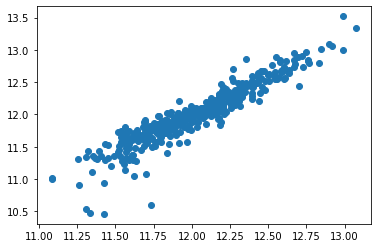

In [105]:
# Plot the prdicted result with the actual target variable to see how the prediction stays closer to the actual result.
plt.scatter(Y_pred_ridgecv,y_test)

In [68]:
# Finalized model
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
Y_pred_linear = linear_model.predict(X_test)

In [136]:
# Performance measures of linear regression model
print('Linear Regressor R2_score  - ' ,r2_score(y_test,Y_pred_linear))
print('Linear Regressor MSE error - ' , mean_squared_error(y_test,Y_pred_linear))
print('Linear Regressor Root MSE  - ' ,np.sqrt(mean_squared_error(y_test,Y_pred_linear)))
print('LInear Regressor Score     - ', linear_model.score(X_train,y_train))

Linear Regressor R2_score  -  0.8703622293289747
Linear Regressor MSE error -  0.024500176442302186
Linear Regressor Root MSE  -  0.15652532204823022
LInear Regressor Score     -  0.8962274177869479


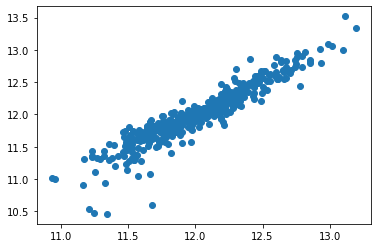

In [70]:
# Plot the prdicted result with the actual target variable to see how the prediction stays closer to the actual result.
plt.scatter(Y_pred_linear,y_test)

In [139]:
# Store the trained model as a pickle file, so that it can be re-used directly
pickle.dump(model,open('House_prediction_linear_reg_model.pkl','wb'))
pickle.dump(model,open('House_prediction_Ridge_model.pkl','wb'))


In [142]:

## CONCLUSION
# Both Ridge and Linear regression model performs better. Hence saved both the models as a pickle. 
# Performance measures of linear regression model
print('Linear Regressor R2_score  - ' ,r2_score(y_test,Y_pred_linear))
print('Linear Regressor MSE error - ' , mean_squared_error(y_test,Y_pred_linear))
print('Linear Regressor Root MSE  - ' ,np.sqrt(mean_squared_error(y_test,Y_pred_linear)))
print('LInear Regressor Score     - ', linear_model.score(X_train,y_train))

print('\n')
# Performance measures of linear regression model
print('Ridge Regressor R2_score  - ' ,r2_score(y_test,Y_pred_ridgecv))
print('Ridge Regressor MSE error - ' , mean_squared_error(y_test,Y_pred_ridgecv))
print('Ridge Regressor Root MSE  - ' ,np.sqrt(mean_squared_error(y_test,Y_pred_ridgecv)))
print('Ridge Regressor Score     - ', rcv.score(X_train,y_train))

Linear Regressor R2_score  -  0.8703622293289747
Linear Regressor MSE error -  0.024500176442302186
Linear Regressor Root MSE  -  0.15652532204823022
LInear Regressor Score     -  0.8962274177869479


Ridge Regressor R2_score  -  0.8692704164923117
Ridge Regressor MSE error -  0.024706517595823655
Ridge Regressor Root MSE  -  0.15718307032191367
Ridge Regressor Score     -  0.8961284297322586
